# FSS Validation Graphs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
df_uvv = pd.read_csv('/home/scratch/jcorner1/syn_sev/dataframes/FSS/FSS_UVV_dataframe.csv')
df_dvv = pd.read_csv('/home/scratch/jcorner1/syn_sev/dataframes/FSS/FSS_DVV_dataframe.csv')
df_uh = pd.read_csv('/home/scratch/jcorner1/syn_sev/dataframes/FSS/FSS_UH_dataframe.csv')

In [3]:
#load wrf-bcc dataset
df_UVV = pd.read_csv(f'/home/scratch/jcorner1/syn_sev/dataframes/HIST_UVV_REFC_regrid_threshold_dataframe.csv')
df_DVV = pd.read_csv(f'/home/scratch/jcorner1/syn_sev/dataframes/HIST_DVV_REFC_regrid_threshold_dataframe.csv')
df_UH = pd.read_csv(f'/home/scratch/jcorner1/syn_sev/dataframes/HIST_UH_REFC_regrid_threshold_dataframe.csv')

In [4]:
#load the SPC reports
#NOTE: These data have been regridded to the 80-km previously
df_tor = pd.read_csv(f'/home/scratch/jcorner1/syn_sev/dataframes/SPC_LSRs_regridded_tor_fix.csv')
df_hail = pd.read_csv(f'/home/scratch/jcorner1/syn_sev/dataframes/SPC_LSRs_regridded_hail_fix.csv')
df_wind = pd.read_csv(f'/home/scratch/jcorner1/syn_sev/dataframes/SPC_LSRs_regridded_wind_fix.csv')
df_all = pd.concat([df_wind, df_hail, df_tor])
print(f'Tornado count:{len(df_tor)}, Hail count:{len(df_hail)}, Wind count:{len(df_wind)}') 

Tornado count:18808, Hail count:143877, Wind count:149338


### Calculate the Report Differences

In [5]:
#iterate through VAR and Z values for subsetting
df_DVV['DVV'] = np.absolute(df_DVV['DVV'].values)

#create a new dataframe
df_res_dvv = pd.DataFrame(columns=['DBZ', 'DVV', 'TOR_DIFF', 'WIND_DIFF', 'HAIL_DIFF', 'ALL_DIFF'])

for refc in np.arange(40, 66, 5):
    for DVV in np.arange(5, 11, 1):
        
        #subset the dataframe based on current threshold values
        df_sub = df_DVV[((df_DVV['DBZ'] >= refc) & (df_DVV['DVV'] >= DVV))]
        
        df_res_dvv = df_res_dvv.append({'DBZ': refc, 'DVV': DVV, 'TOR_DIFF':len(df_tor) - len(df_sub),
                       'HAIL_DIFF':len(df_hail) - len(df_sub), 'WIND_DIFF':len(df_wind) - len(df_sub),
                       'ALL_DIFF':len(df_all) - len(df_sub)}, ignore_index=True)

In [6]:
#create a new dataframe
df_res_uvv = pd.DataFrame(columns=['DBZ', 'UVV', 'TOR_DIFF', 'WIND_DIFF', 'HAIL_DIFF', 'ALL_DIFF'])

#iterate through VAR and Z values for subsetting
for refc in np.arange(40, 66, 5):
    for UVV in np.arange(18, 31, 1):
        
        #subset the dataframe based on current threshold values
        df_sub = df_UVV[((df_UVV['DBZ'] >= refc) & (df_UVV['UVV'] >= UVV))]
        
        df_res_uvv = df_res_uvv.append({'DBZ': refc, 'UVV': UVV, 'TOR_DIFF':len(df_tor) - len(df_sub),
                       'HAIL_DIFF':len(df_hail) - len(df_sub), 'WIND_DIFF':len(df_wind) - len(df_sub),
                       'ALL_DIFF':len(df_all) - len(df_sub)}, ignore_index=True)

In [7]:
#create a new dataframe
df_res_uh = pd.DataFrame(columns=['DBZ', 'UH', 'TOR_DIFF', 'WIND_DIFF', 'HAIL_DIFF', 'ALL_DIFF'])


#iterate through VAR and Z values for subsetting
for refc in np.arange(40, 66, 5):
    for UH in np.arange(35, 86, 5):
        
        #subset the dataframe based on current threshold values
        df_sub = df_UH[((df_UH['DBZ'] >= refc) & (df_UH['UH'] >= UH))]
        
        df_res_uh = df_res_uh.append({'DBZ': refc, 'UH': UH, 'TOR_DIFF':len(df_tor) - len(df_sub),
                       'HAIL_DIFF':len(df_hail) - len(df_sub), 'WIND_DIFF':len(df_wind) - len(df_sub),
                       'ALL_DIFF':len(df_all) - len(df_sub)}, ignore_index=True)

### Create FSS Plots

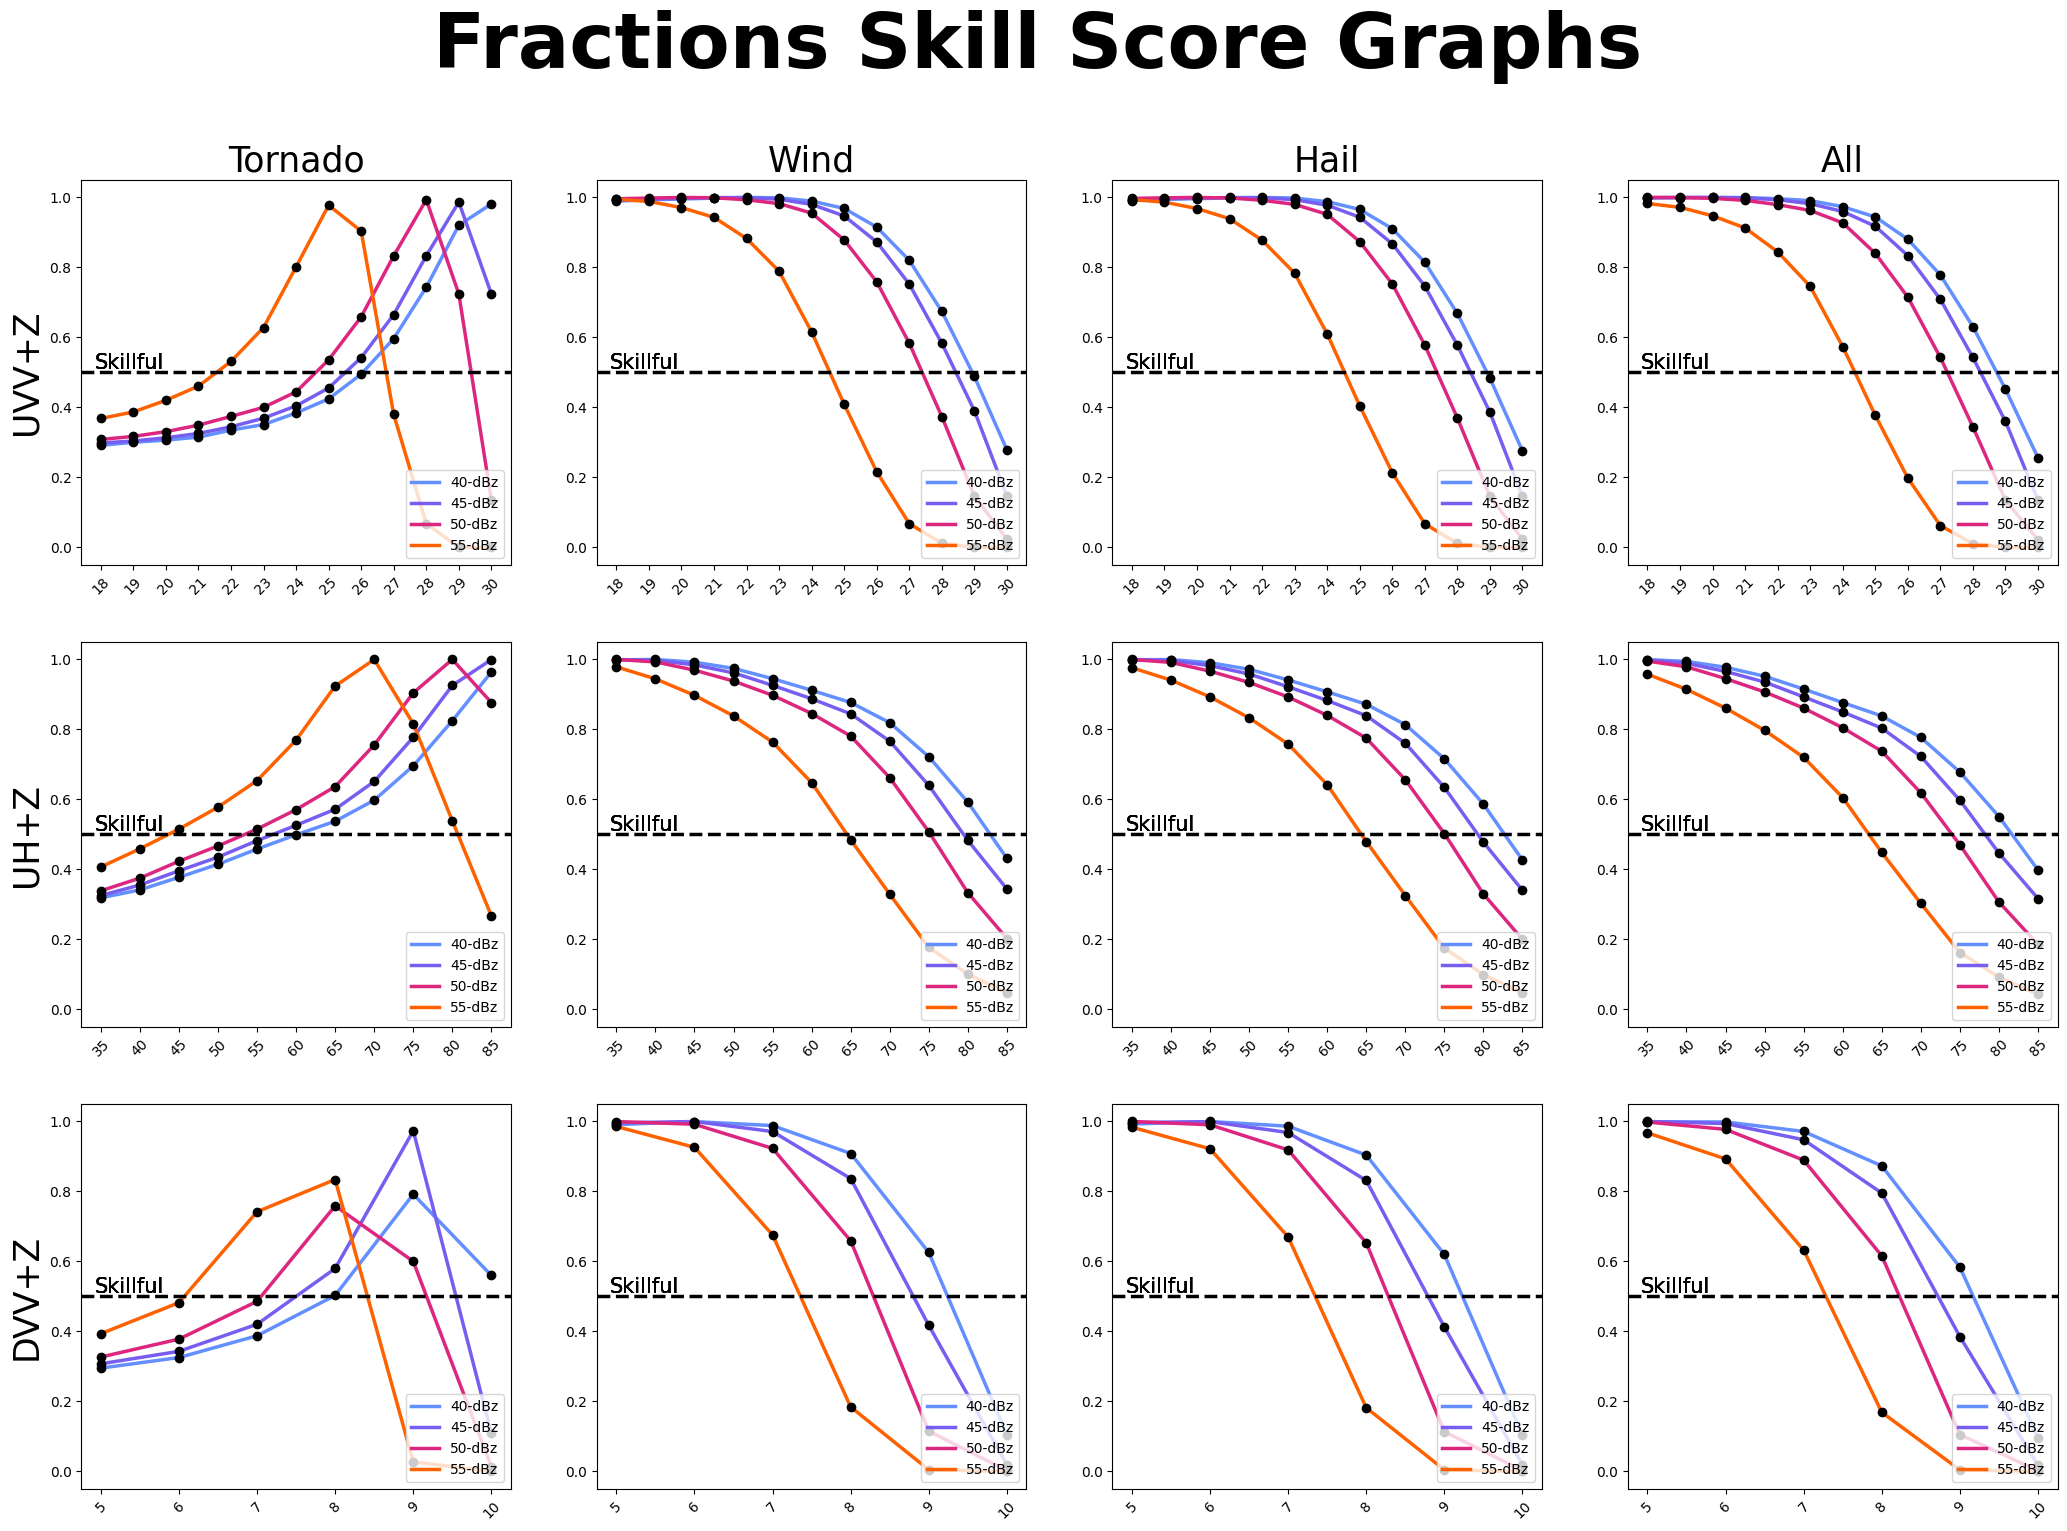

In [16]:
hazs = ['tor', 'wind', 'hail', 'all']
hazss = ['TOR', 'WIND', 'HAIL', 'ALL']
hazards = ['Tornado', 'Wind', 'Hail', 'All']

surs = ['uvv', 'uh', 'dvv']
surrogates = ['UVV', 'UH', 'DVV']

refc = [40, 45, 50, 55]
colors = ["#648FFF", "#785EF0", "#DC267F", "#FE6100"]


plt.figure(figsize=(25.5,17))
j = 1

#iterate through the hazards and surrogates
for sur in range(len(surs)):
    for haz in range(len(hazs)):
    
        #iterate through vars
        ax = plt.subplot(3,4,j)
        
        #iterate through each reflectivty value
        for i in range(len(refc)):
            
            df = locals()[f'df_{surs[sur]}'][(locals()[f'df_{surs[sur]}']['DBZ'] == refc[i])]
            
            plt.plot(np.array(df[f'DVV'].values, dtype=float), df[f'FSS_{hazs[haz]}'].values, lw=2.5, color = colors[i])
                
            plt.xticks(np.array(df[f'DVV'].values, dtype=float), labels = np.array(df[f'DVV'].values, dtype=int), rotation=45)
            plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
            plt.ylim(-0.05, 1.05)
            ax.annotate(f'Skillful', (0.03,0.51), fontsize=15, xycoords='axes fraction')
                       
            plt.legend([x + '-dBz' for x in list(map(str, np.arange(40, 56, 5)))], loc ='lower right').set_zorder(12)

        plt.axhline(y = 0.5, color = 'black', ls='--', lw=2.5)
        
        if j <= 4:
            plt.title(f'{hazards[haz]}',fontsize=25)
            
        if j in [1, 5, 9, 13]:
             plt.ylabel(f'{surrogates[sur]}+Z',fontsize=25)
            
        for i in range(len(refc)):
            df = locals()[f'df_{surs[sur]}'][(locals()[f'df_{surs[sur]}']['DBZ'] == refc[i])]
            plt.scatter(np.array(df[f'DVV'].values, dtype=float), df[f'FSS_{hazs[haz]}'].values, color = 'black', zorder=10)
        
        j = j + 1
title = plt.suptitle('Fractions Skill Score Graphs', size=55).set_weight('bold')                    
plt.savefig('../Plots/FSS_plots.png', format='png', dpi=500, bbox_inches='tight')

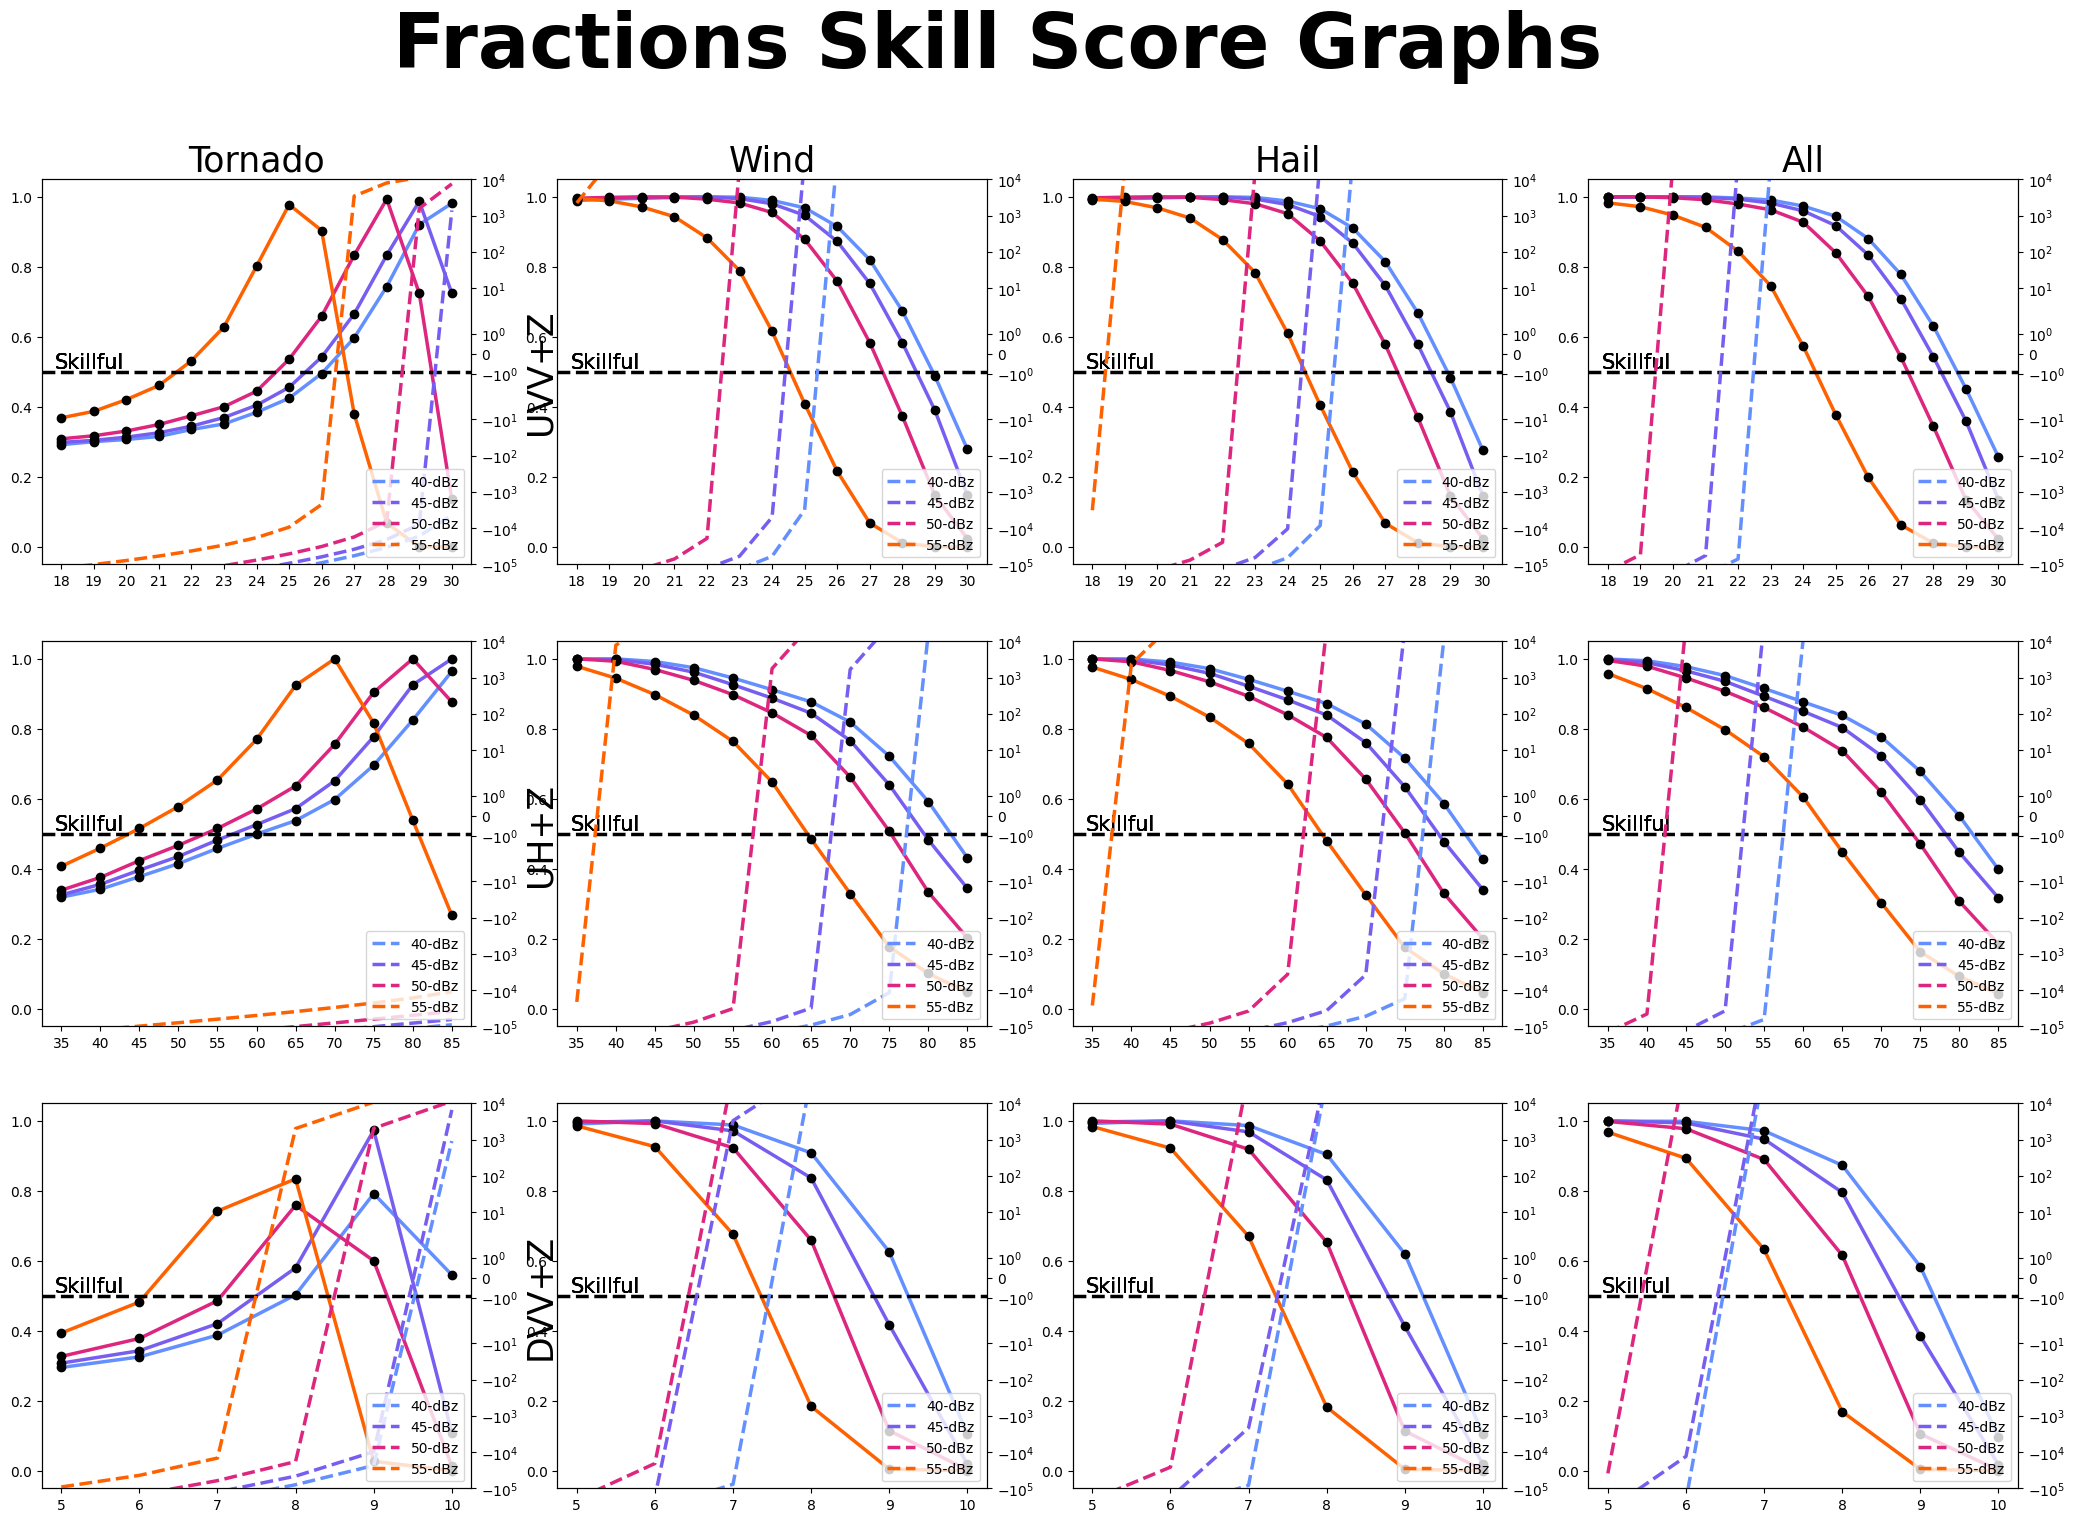

In [15]:
plt.figure(figsize=(25.5,17))
j = 1

#iterate through the hazards and surrogates
for sur in range(len(surs)):
    for haz in range(len(hazs)):
    
        #iterate through vars
        ax1 = plt.subplot(3,4,j)
        ax2 = ax1.twinx()
        
        #iterate through each reflectivty value
        for i in range(len(refc)):
            
            df = locals()[f'df_{surs[sur]}'][(locals()[f'df_{surs[sur]}']['DBZ'] == refc[i])]
            df2 = locals()[f'df_res_{surs[sur]}'][(locals()[f'df_res_{surs[sur]}']['DBZ'] == refc[i])]
            
            ax1.plot(np.array(df[f'DVV'].values, dtype=float), df[f'FSS_{hazs[haz]}'].values, lw=2.5, color = colors[i])
            ax2.plot(np.array(df2[f'{surrogates[sur]}'].values, dtype=float), df2[f'{hazss[haz]}_DIFF'].values, lw=2.5, color = colors[i], ls='--' )
            
            plt.xticks(np.array(df[f'DVV'].values, dtype=float), labels = np.array(df[f'DVV'].values, dtype=int), rotation=45)
            ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
            ax2.set_yscale('symlog')
            ax2.set_ylim(-100000,10000)
            ax1.set_ylim(-0.05, 1.05)
            
            ax1.annotate(f'Skillful', (0.03,0.51), fontsize=15, xycoords='axes fraction')
                       
            plt.legend([x + '-dBz' for x in list(map(str, np.arange(40, 56, 5)))], loc ='lower right').set_zorder(12)

        ax1.axhline(y = 0.5, color = 'black', ls='--', lw=2.5)

        if j <= 4:
            plt.title(f'{hazards[haz]}',fontsize=25)
            
        if j in [1, 5, 9, 13]:
             plt.ylabel(f'{surrogates[sur]}+Z',fontsize=25)
            
        for i in range(len(refc)):
            df = locals()[f'df_{surs[sur]}'][(locals()[f'df_{surs[sur]}']['DBZ'] == refc[i])]
            ax1.scatter(np.array(df[f'DVV'].values, dtype=float), df[f'FSS_{hazs[haz]}'].values, color = 'black', zorder=10)
        
        j = j + 1
title = plt.suptitle('Fractions Skill Score Graphs', size=55).set_weight('bold')                    
plt.savefig('../Plots/FSS_diff_plots.png', format='png', dpi=500, bbox_inches='tight')

In [11]:
df

,Unnamed: 0,DBZ,DVV,FSS_tor,FSS_wind,FSS_hail,FSS_all
39,39,55.0,18.0,0.368392,0.995019,0.993793,0.982636
40,40,55.0,19.0,0.387045,0.988353,0.986532,0.971631
41,41,55.0,20.0,0.420362,0.971041,0.968272,0.947517
42,42,55.0,21.0,0.460891,0.942941,0.939223,0.912743
43,43,55.0,22.0,0.531369,0.882678,0.877798,0.844574
44,44,55.0,23.0,0.628279,0.789107,0.783432,0.746000
45,45,55.0,24.0,0.801634,0.615624,0.609967,0.573717
46,46,55.0,25.0,0.977619,0.409024,0.404682,0.377337
47,47,55.0,26.0,0.903629,0.215987,0.213537,0.198229
48,48,55.0,27.0,0.379777,0.068076,0.067287,0.062372
